In [30]:
import numpy as np

def random_matrix(m):
    return np.random.choice([-1,1], size = (m+1,m+1))
                        
#Example

m = 3
A = random_matrix(m)

In [49]:
# Define function to find the other quadrats of the diamond

def generating_T_x(A):
    m = len(A) - 1  # Assuming A is a square matrix
    # Reflection on x-axis; Quadrant 2
    #T_x = np.flip(A, axis = 1)
    T_x = A.copy()
    T_xy = np.flip(T_x, axis=0)  # Reflect T_x along the x-axis
    T_y = np.flip(A, axis = 0)
    
    for i in range(m+1):
        for j in range(m+1):
            if j % 2 == 1:
                T_x[i][j] *= -1 
            if i % 2 == 1:
                T_xy[i][j] *= -1
            if i % 2 == 1:
                T_y[i][j] *= -1

    return A, T_x, T_xy, T_y

print(generating_T_x(A))
# Reflactionof y-axis; Quadrant 4



(array([[ 1, -1,  1],
       [-1,  1,  1],
       [ 1,  1,  1]]), array([[ 1,  1,  1],
       [-1, -1,  1],
       [ 1, -1,  1]]), array([[ 1, -1,  1],
       [-1, -1,  1],
       [ 1,  1,  1]]), array([[ 1,  1,  1],
       [-1,  1,  1],
       [ 1, -1,  1]]))


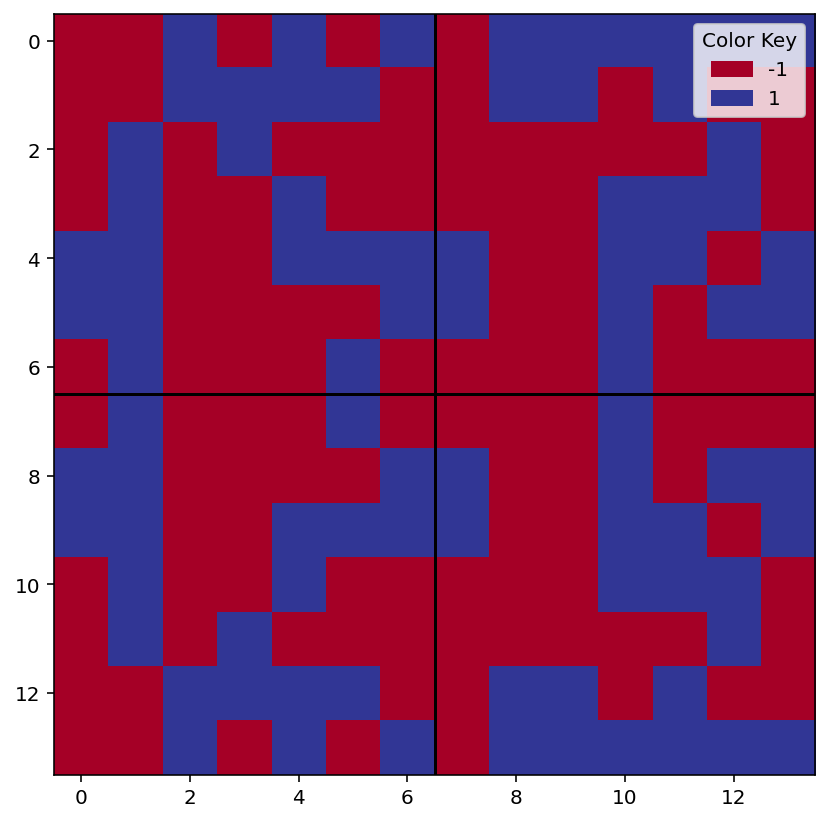

In [51]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Example matrix
A = random_matrix(6)

result = generating_T_x(A)

# Arrange matrices in quadrants
top_left = result[1]  # T_x
top_right = result[0]  # A
bottom_left = result[2]  # T_xy
bottom_right = result[3]  # T_y

# Create a diagram with positive and negative colors
diagram = np.concatenate((np.concatenate((top_left, top_right), axis=1),
                          np.concatenate((bottom_left, bottom_right), axis=1)), axis=0)

# Plot the diagram with positive and negative colors
cmap = plt.cm.RdYlBu  # Choose a colormap
norm = plt.Normalize(vmin=-1, vmax=1)  # Normalize values to -1 and 1
plt.imshow(diagram, cmap=cmap, norm=norm)

# Add axis lines
plt.axvline(x=top_left.shape[1] - 0.5, color='black', linestyle='-', linewidth=1.5)  # Vertical line
plt.axhline(y=top_left.shape[0] - 0.5, color='black', linestyle='-', linewidth=1.5)  # Horizontal line


# Add a color key
legend_elements = [Patch(color=cmap(norm(-1)), label='-1'), Patch(color=cmap(norm(1)), label='1')]
plt.legend(handles=legend_elements, title='Color Key')

plt.show()